<a href="https://colab.research.google.com/github/knickka/Malaria/blob/main/Malaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Datas

In [4]:
# IMPORTING DEPENDENCIES
import tensorflow
import matplotlib.pyplot as plt
import numpy as np
import tensorflow_datasets as tfds

In [62]:
dataset, dataset_info = tfds.load(name = 'malaria', shuffle_files = True, as_supervised = True, split= 'train',with_info = True ) # downloading data

In [63]:
len(dataset)

27558

In [64]:
#function to split the dataset into train,validation and test sets
def splits(dataset,TRAIN_RATIO,VAL_RATIO,TEST_RATIO):
  DATASET_SIZE =  len(dataset)


  train_dataset = dataset.take(int(TRAIN_RATIO*DATASET_SIZE))
  val_dataset = (dataset.skip(int(TRAIN_RATIO*DATASET_SIZE))).take(int(VAL_RATIO*DATASET_SIZE))
  test_dataset = (dataset.skip(int((TRAIN_RATIO+VAL_RATIO)*DATASET_SIZE))).take(int(TEST_RATIO*DATASET_SIZE))

  return train_dataset,val_dataset,test_dataset


In [65]:
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1

train_dataset,val_dataset,test_dataset = splits(dataset, TRAIN_RATIO,VAL_RATIO,TEST_RATIO)

print(train_dataset,val_dataset,test_dataset)

<_TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))> <_TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))> <_TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>


In [66]:
len(test_dataset)

2755

In [79]:
dataset_info.features['label']

ClassLabel(shape=(), dtype=int64, num_classes=2)

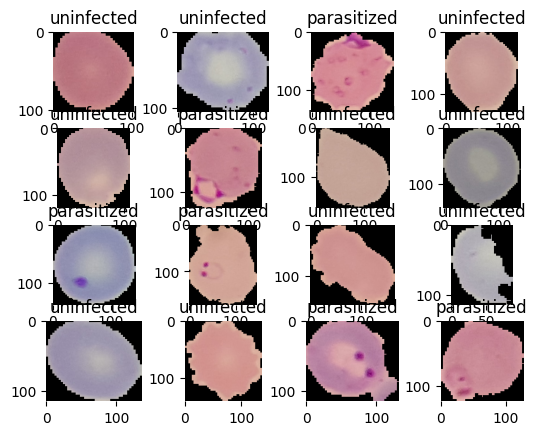

In [90]:
for i, (image,label)in enumerate(train_dataset.take(16)):
  ax = plt.subplot(4,4,i+1,frameon=False)
  plt.imshow(image)
  plt.title(dataset_info.features['label'].int2str(label))

